In [ ]:
# Imports
library(Seurat)
library(decoupleR)
library(stringr) 
library(gridExtra)
library(dplyr)
library(tibble)
library(tidyr)
library(ggplot2)
library(ggrepel)
library(grid)
library(SingleR)
library(xtable)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=18, repr.plot.height=22)

# Read mouse macrophage R object
myeloids <- readRDS("../../../data/R Objects/Myeloid R Objects/all_mice_myeloid_data_v3.rds")

In [27]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=32, repr.plot.height=16)

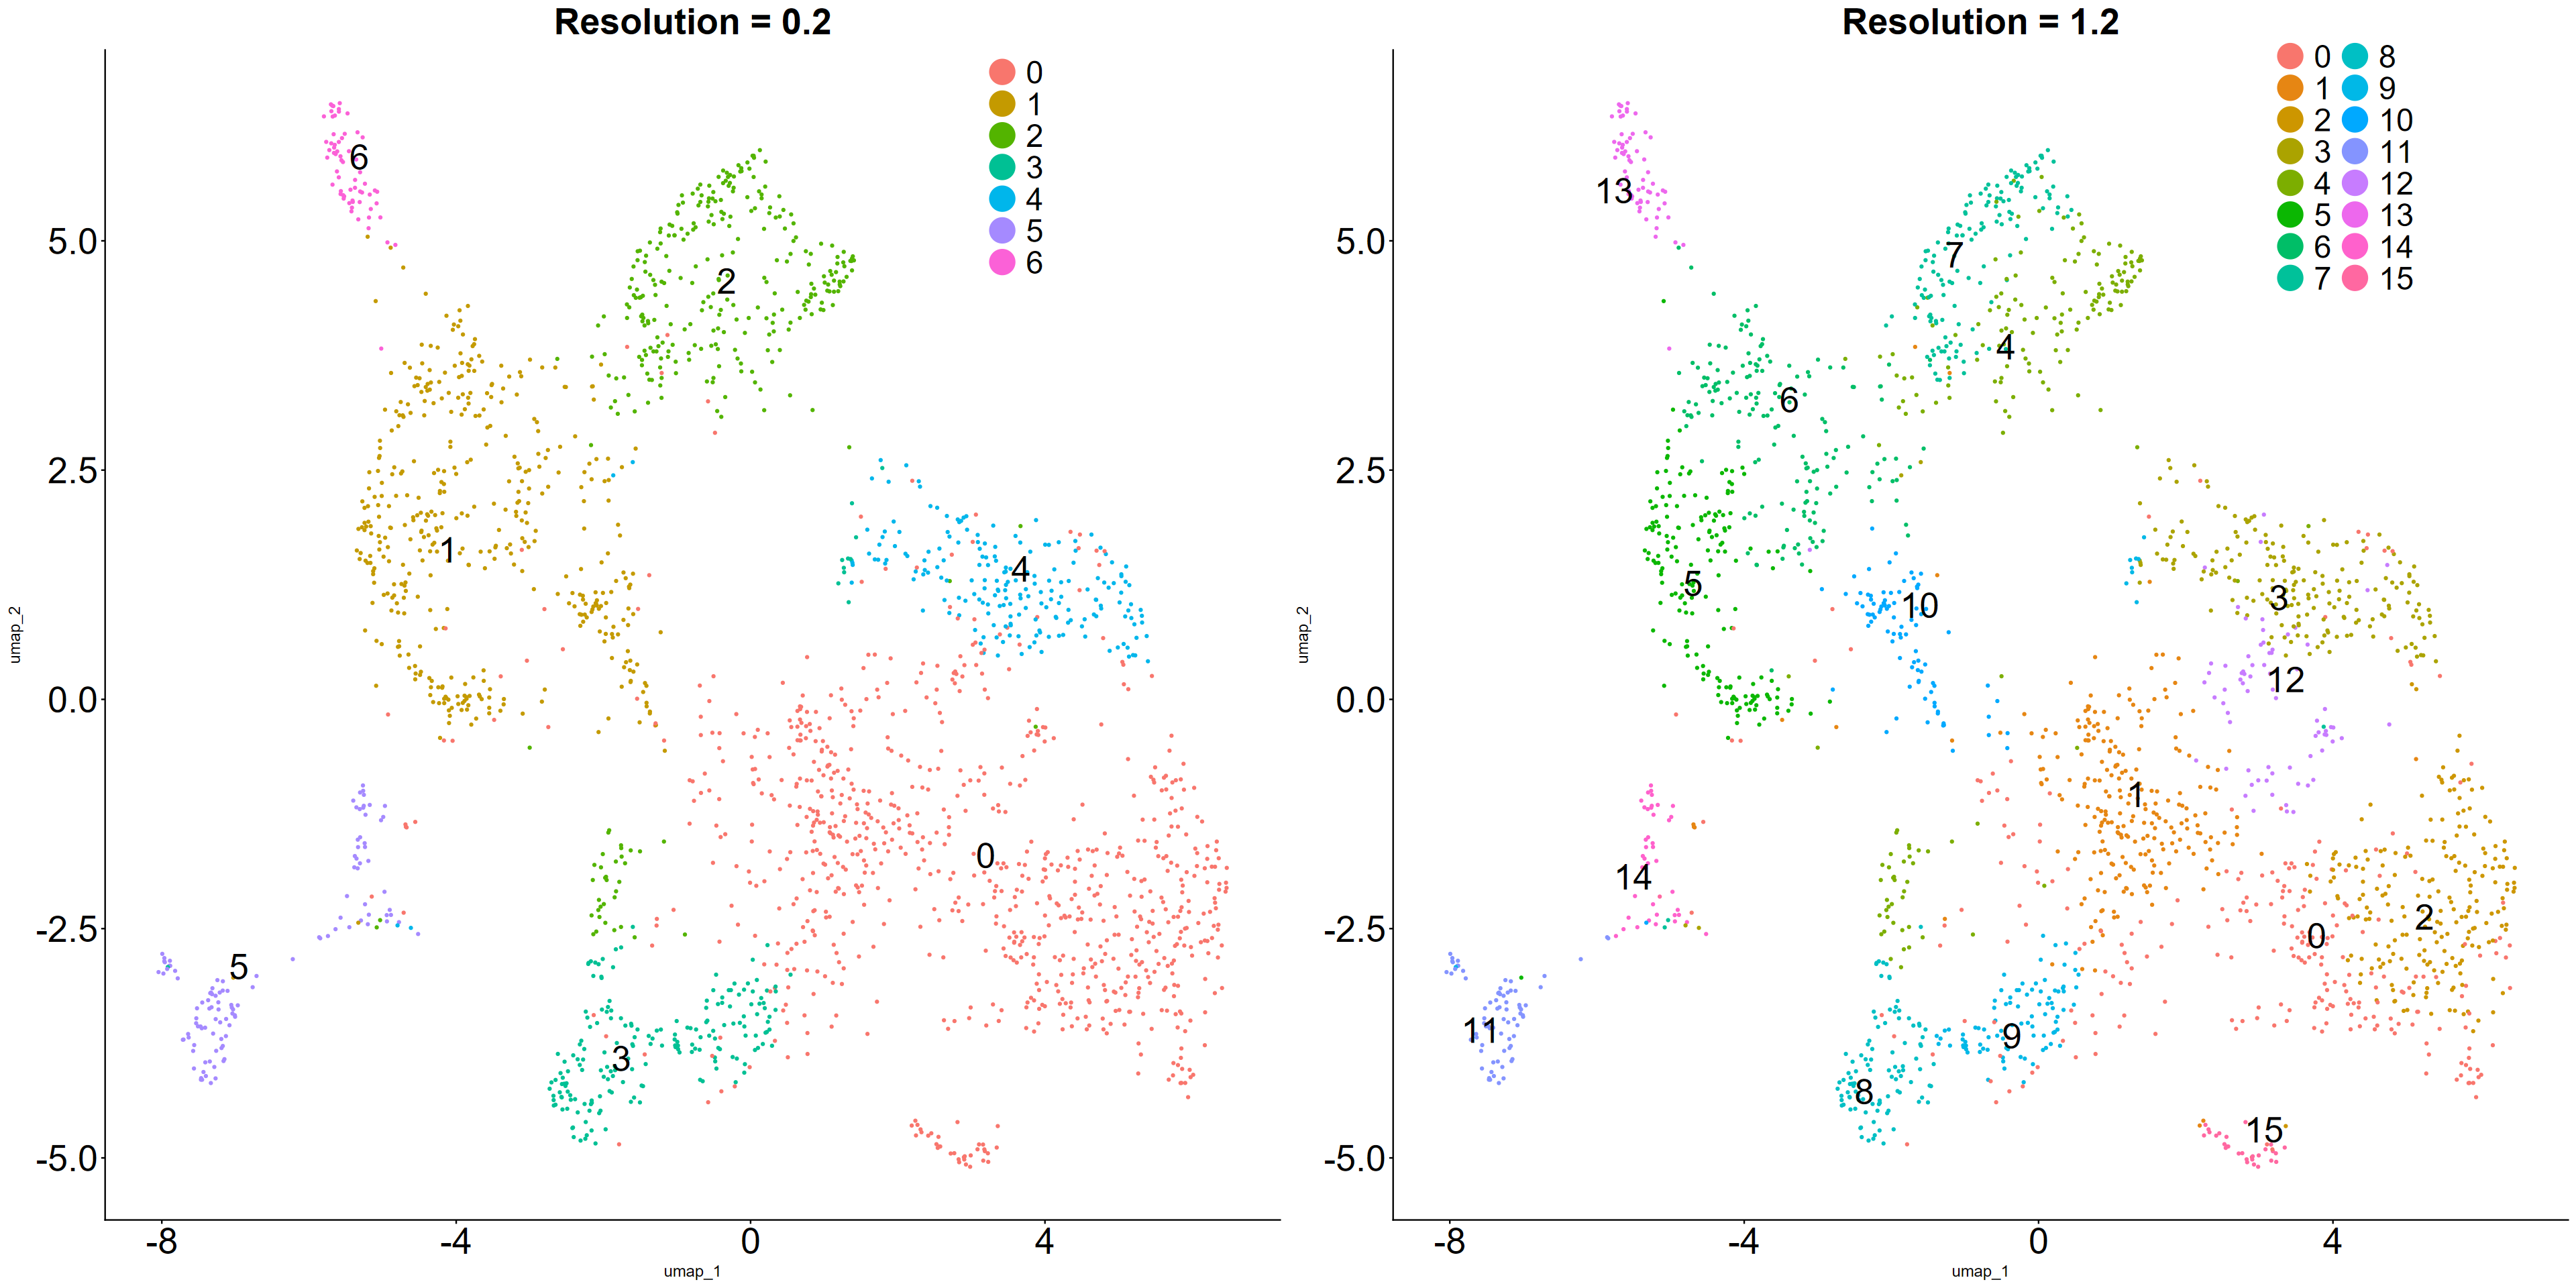

In [28]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(myeloids, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32),, axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1)) + ggtitle("Resolution = 0.2")
res_2 <- DimPlot(myeloids, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32),, axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))  + ggtitle("Resolution = 1.2")

# Plot
grid.arrange(res_1, res_2, ncol=2)

In [119]:
# Assign the slot "Seurat Cluster" to the desired resolution
myeloids$seurat_clusters <- myeloids$`RNA_snn_res.1.2`

In [ ]:
# Assign resolution to identity
myeloids <- SetIdent(myeloids, value = "seurat_clusters")
myeloids <- RenameIdents(myeloids,
                                   '0' = 'Macrophages',
                                   '1' = 'Macrophages',
                                   '2' = 'Macrophages', 
                                   '3' = 'Macrophages',
                                   '4' = 'Macrophages',
                                   '5' = 'Dendritic cells',
                                   '6' = 'Dendritic cells',
                                   '7' = 'Monocytes',
                                   '8' = 'Macrophages', 
                                   '9' = 'Macrophages',
                                   '10' = 'Macrophages',
                                   '11' = 'Dendritic cells',
                                   '12' = 'Macrophages',
                                   '13' = 'Dendritic cells', 
                                   '14' = 'Dendritic cells',
                                   '15' = 'T-cell') 

In [ ]:
# Find markers
markers <- FindAllMarkers(myeloids, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

Calculating cluster Macrophages

Calculating cluster Dendritic cells

Calculating cluster Monocytes

Calculating cluster T-cell



In [ ]:
# Plot of Final annotations
myeloids$cell_type_idents <- Idents(myeloids)
final_annotation <- DimPlot(object = myeloids, reduction = "umap", label = T, label.size = 7, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.75, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

# Plot of Final annotations
res_1.2_plot <- DimPlot(myeloids, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T, label.size = 7) + theme(legend.position= "none", plot.title = element_blank())

# Plot heatmap
heatmap <- DoHeatmap(myeloids, features = top10$gene, size=5, angle=0, raster=FALSE, label = FALSE) + 
guides(
  colour = FALSE, fill = guide_colorbar(
    barwidth = 2, 
    bar.height = 100, 
    title.theme = element_text(size = 24),
    label.theme = element_text(size = 24))
  ) + 
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(axis.text.y = element_text(size=15))

Warning message in DoHeatmap(myeloids, features = top10$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Cd247, Gimap9, Dntt"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


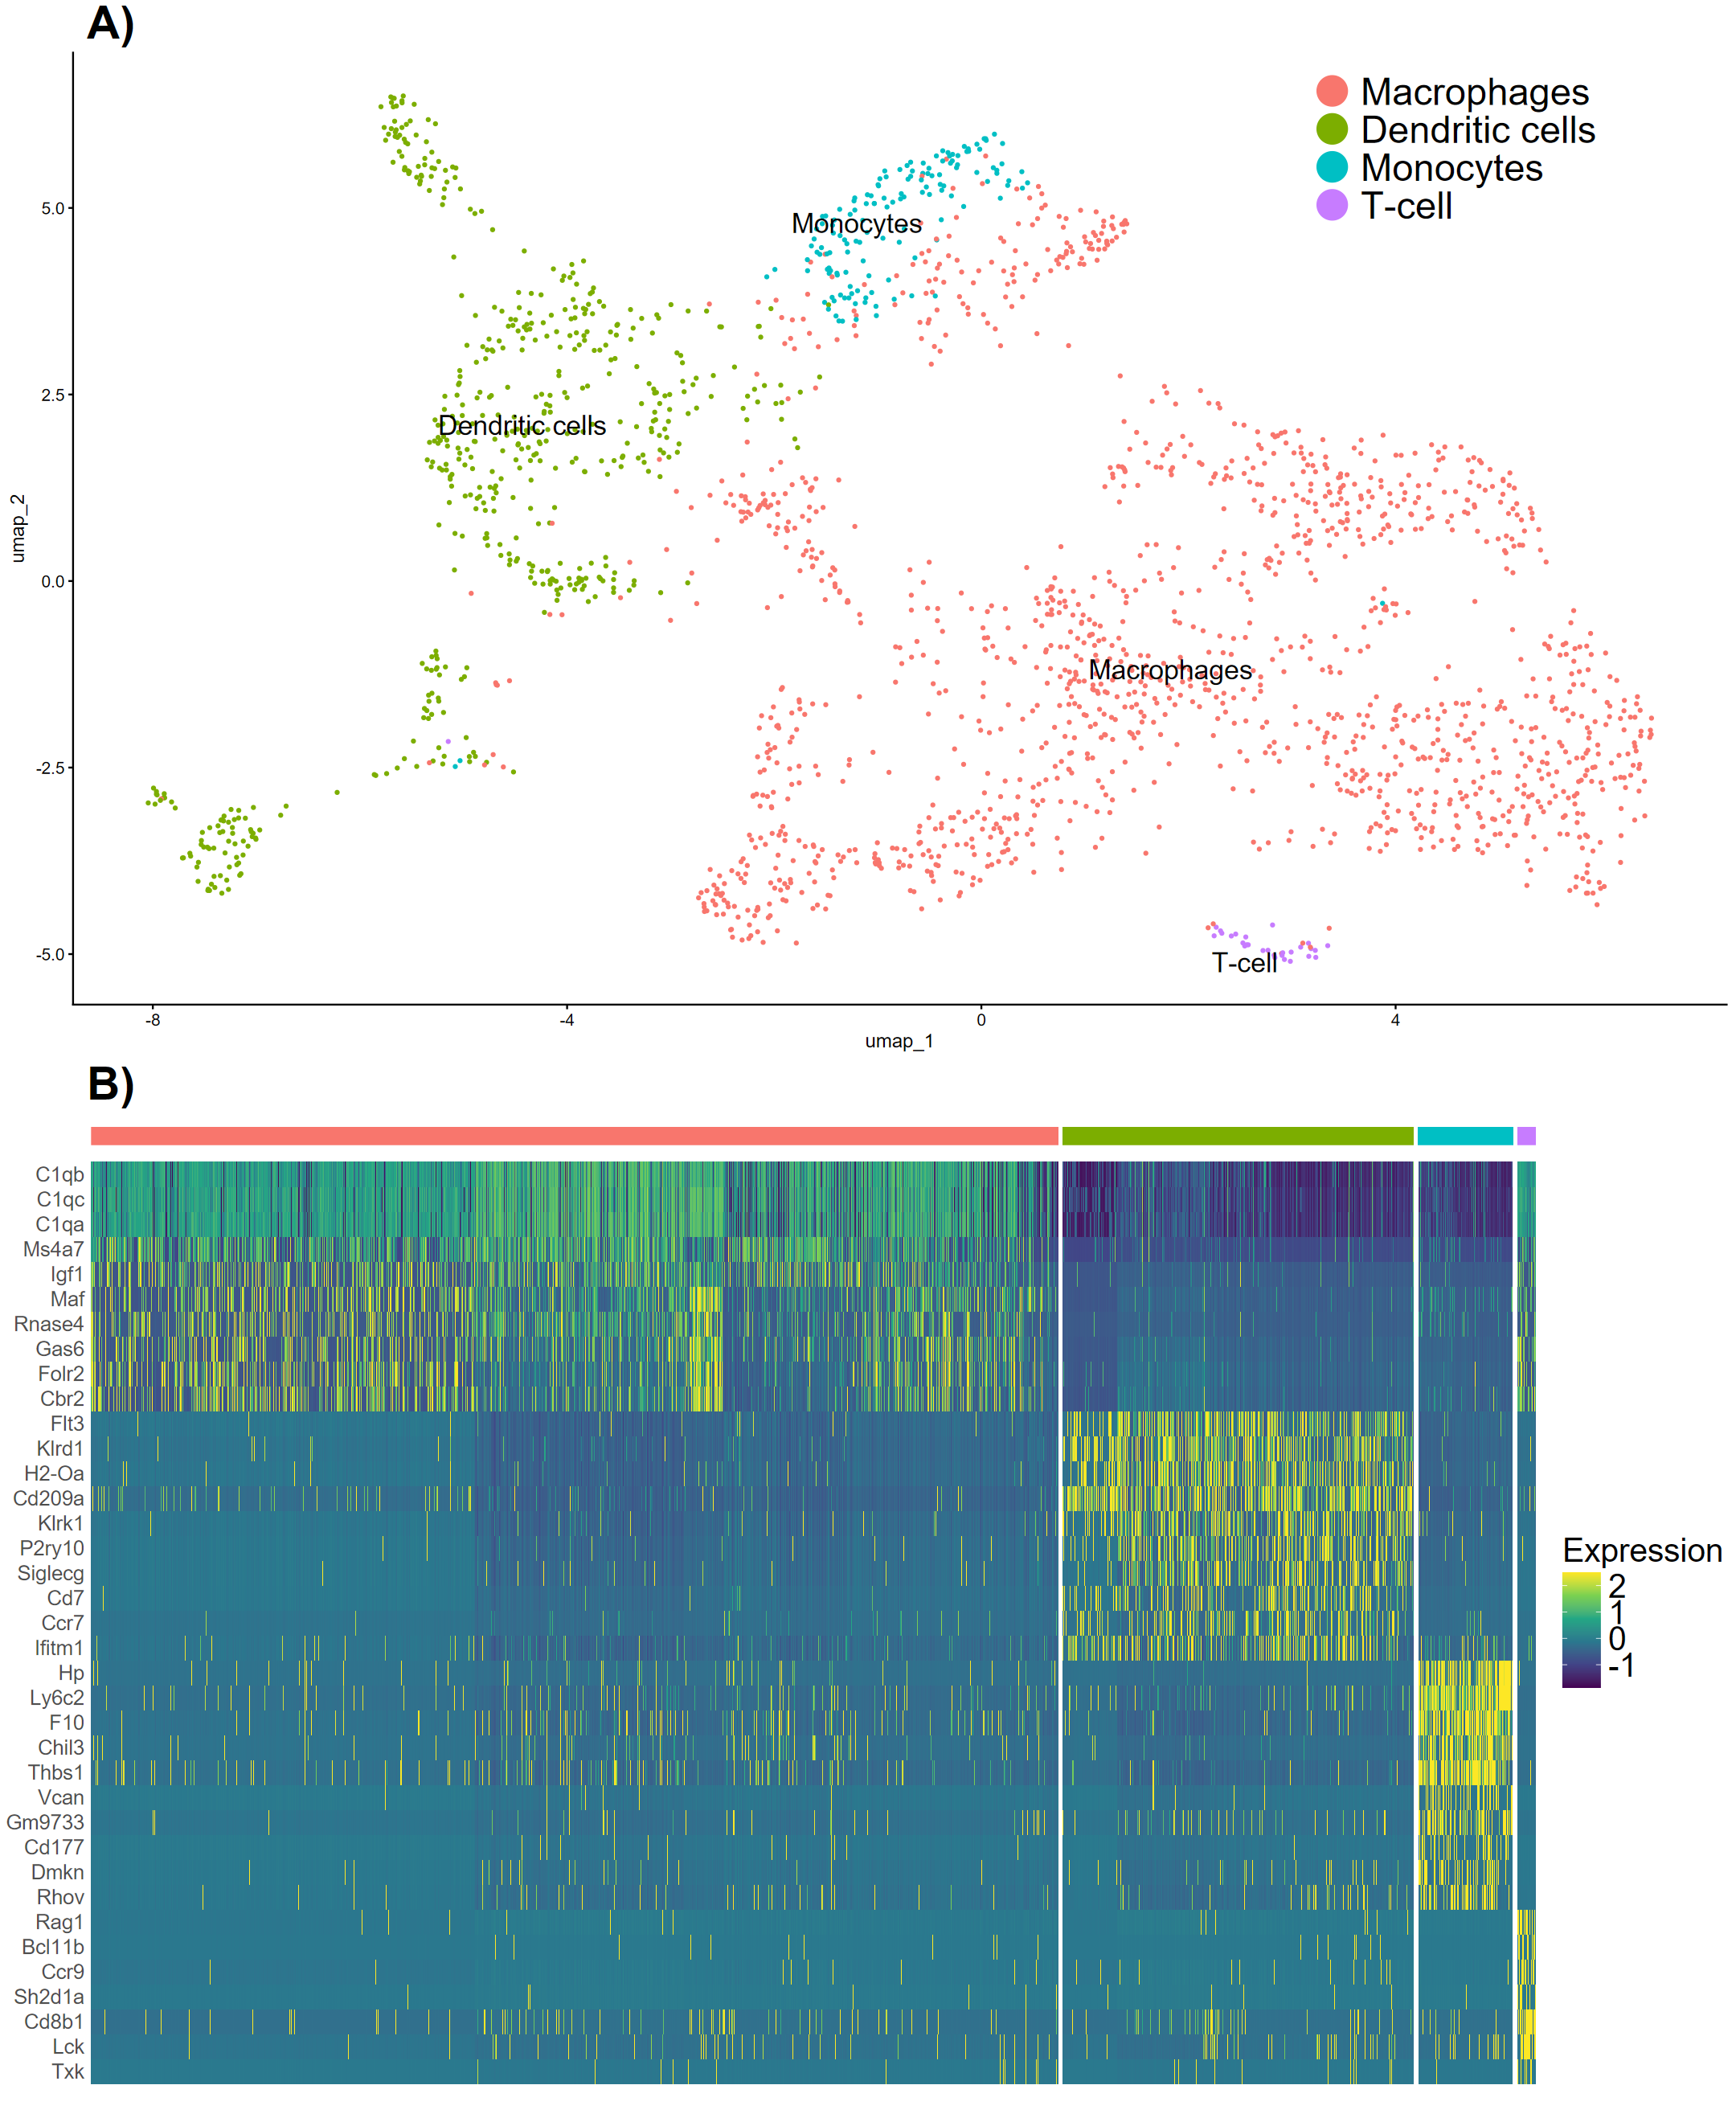

In [124]:
# Define the layout matrix
layout_matrix <- rbind(
  c(1, 1),
  c(2, 2)
)

# Create labeled plots
cluster_umap <- arrangeGrob(res_1.2_plot, 
                                  top = textGrob("XXX)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 34, fontface = "bold")))

final_annotation_plot <- arrangeGrob(final_annotation, 
                               top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

heatmap_plot <- arrangeGrob(heatmap, 
                         top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                        gp = gpar(fontsize = 34, fontface = "bold")))

# Arrange the plots with labels
grid.arrange(
  final_annotation_plot, heatmap_plot,
  layout_matrix = layout_matrix
)

In [ ]:
# Set wd, read integrated mice
setwd("../../../Data/R Objects/Integrated R Objects")
data <- readRDS("all_mice_integrated.rds")

0   1   2   3   4   5   6   7   8   9   ⋯ 18  19 20 21 22 23 24
B cells         714   0   0   0   0   0   3   1   0   2 ⋯   0  0  0  0  3  1  0
Dendritic cells   0   1   0   0   0   0   3   1   0   0 ⋯   0  0  0  0 10  0  0
Erythrocytes      1   7   0   0   0   1   0   0   0   0 ⋯   0  0  0  0  0  0  0
Fibroblasts       0   0   0   0   0   0   0   0   0   0 ⋯   0  0  0  0  0  0  0
Granulocytes      0   0   0   0   0   0   0   1   0   0 ⋯   0  0  0  0  0 40  0
Macrophages       0   0   0 365 380   1   5  34   0   0 ⋯   0 36  0  2  8  0  0
Monocytes         0   3   0  39   6   3 331 303   0   0 ⋯   0 73  1 83 46  1  0
NK cells          0   0  38   0   0  35   0   0   2   5 ⋯   0  0 16  0  0  0  0
T cells           0 512 424   0   0 304   2   0 299 272 ⋯ 121  0 67  1  6  0 37
                25 26 27
B cells          0 32  0
Dendritic cells  0  0  0
Erythrocytes     0  0  0
Fibroblasts      0  0  0
Granulocytes     0  0  0
Macrophages     20  0  0
Monocytes       12  1  0
NK cells         0  0  0
T cells          1  0 19

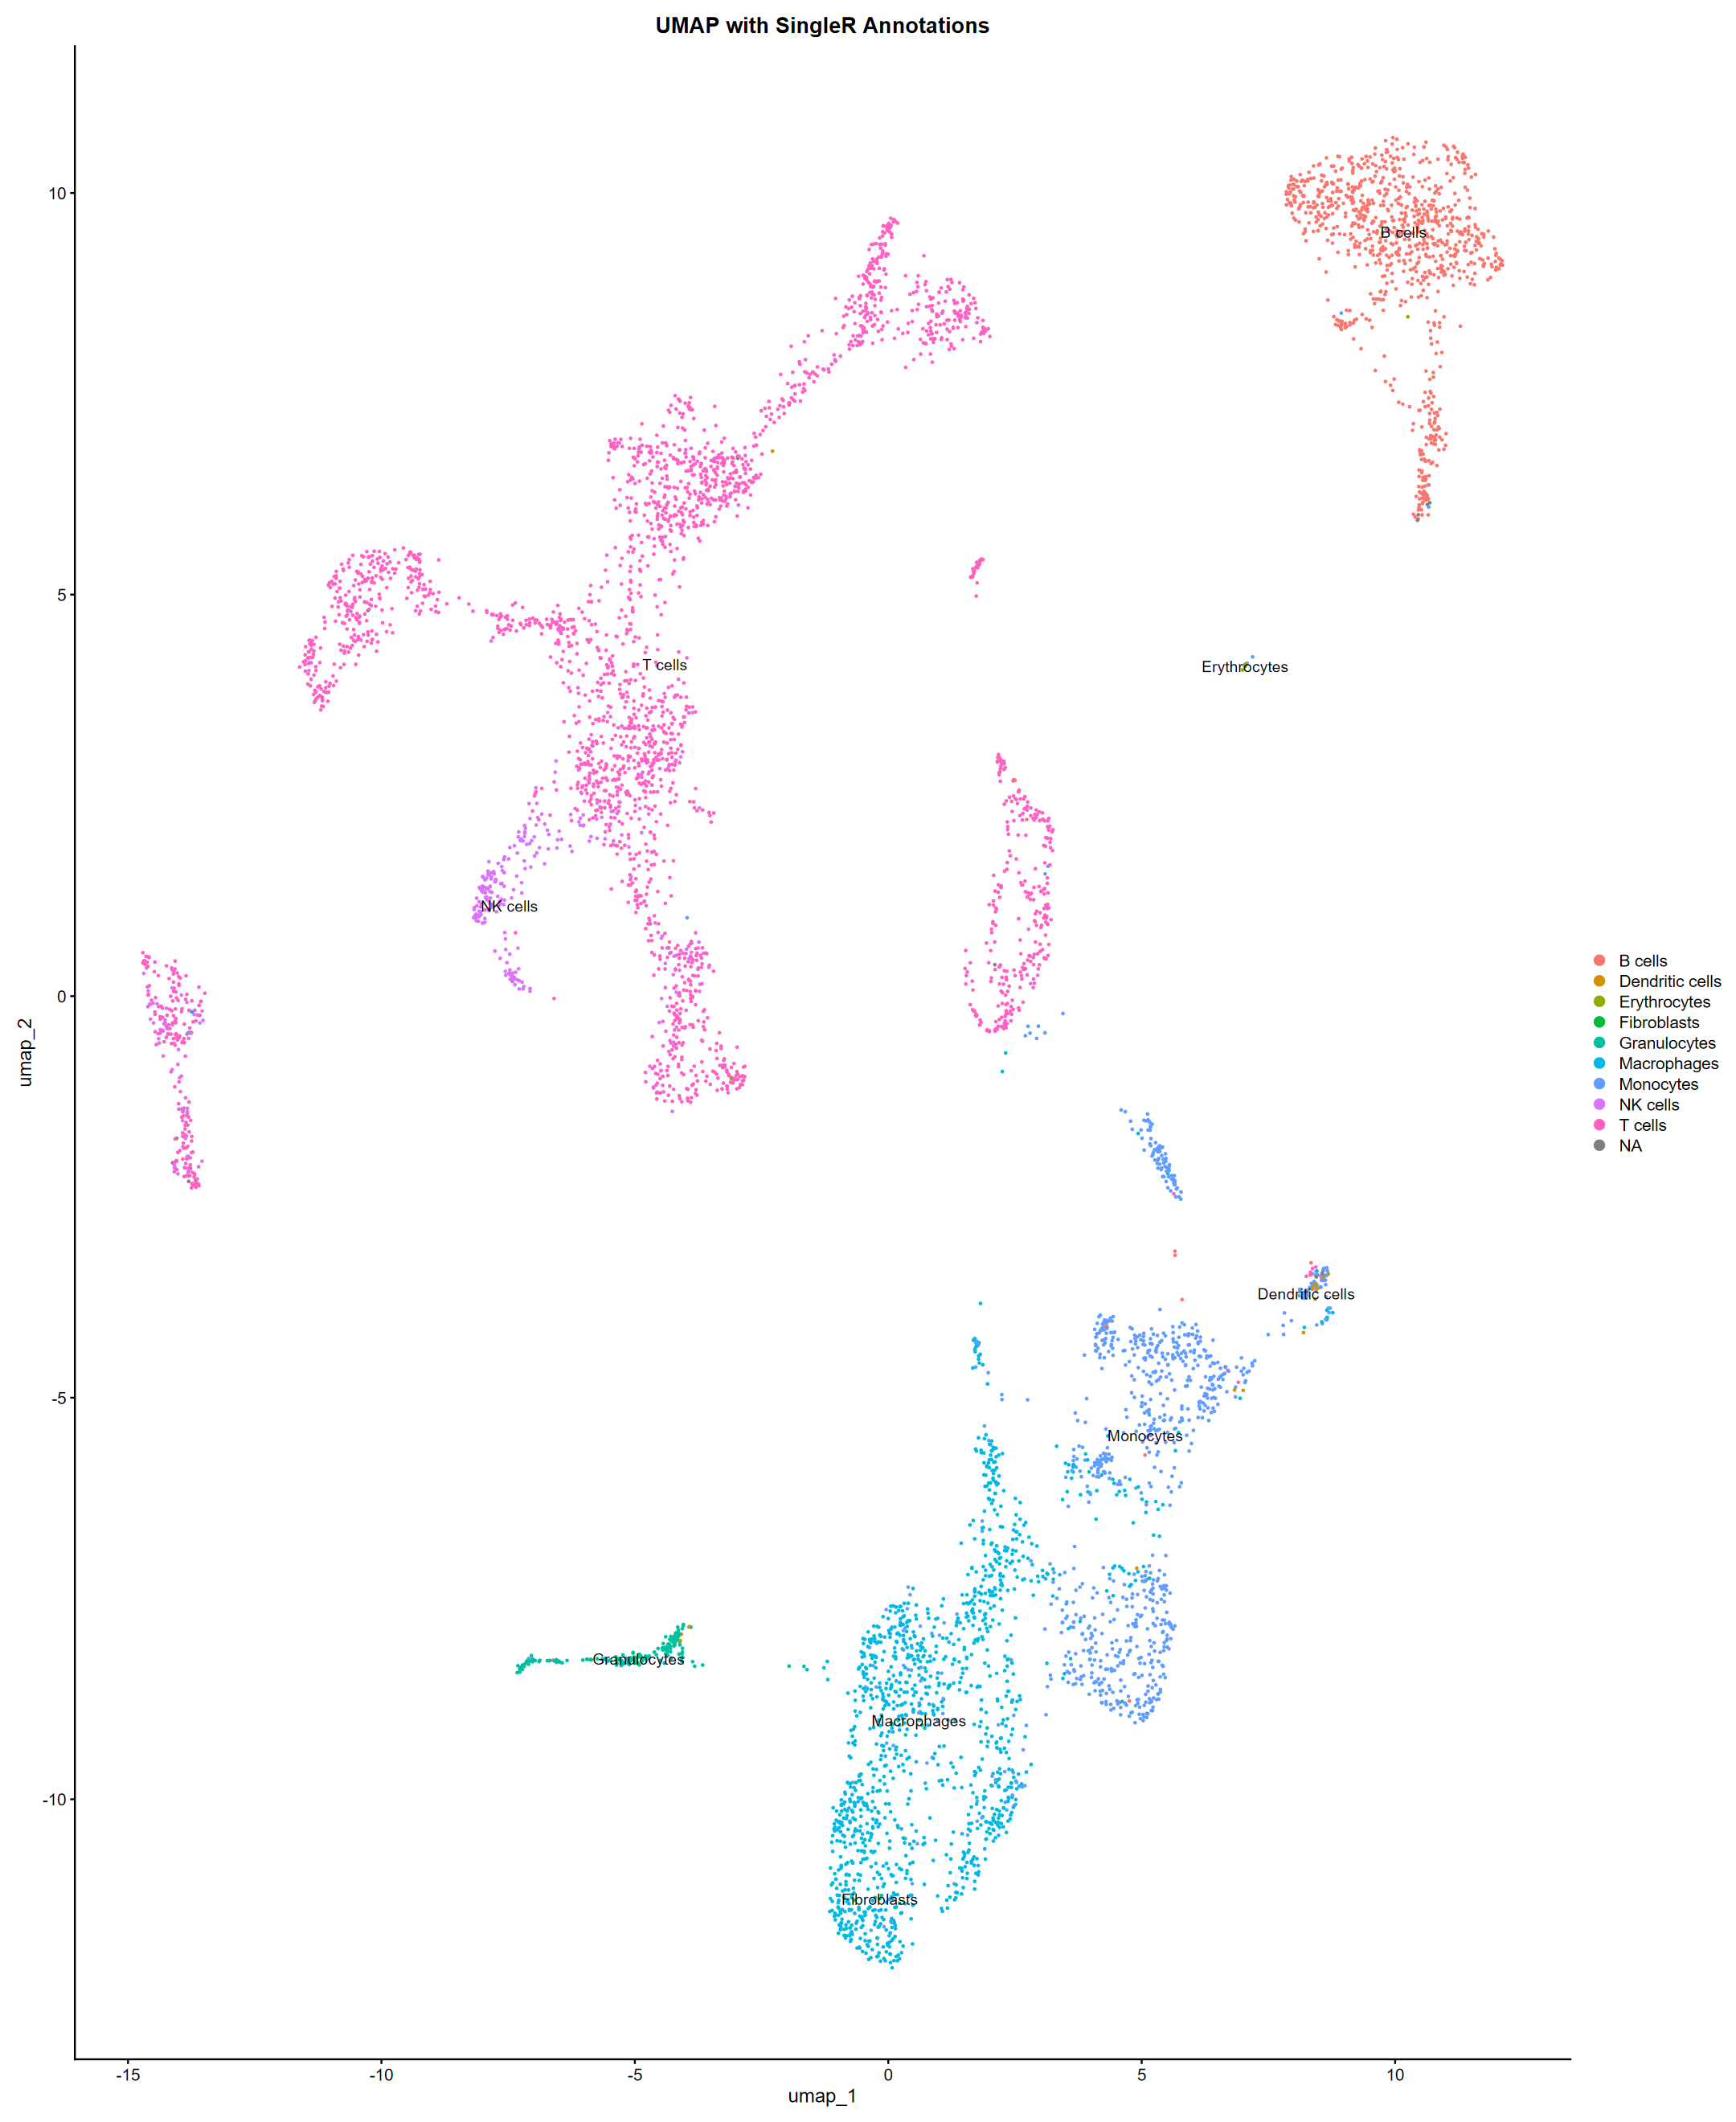

In [ ]:

# Annotation
# Get reference atlas from CellDex
MouseRNAseqData <- celldex::MouseRNAseqData()

# Convert to SCE to use SingleR
data.sce <- as.SingleCellExperiment(data)

# Predict cell types
pred.MouseRNAseqData <- SingleR(test = data.sce, ref = MouseRNAseqData, assay.type.test=1,
    labels = MouseRNAseqData$label.main)

# View annotations


cluster_table <- cbind(table(pred.MouseRNAseqData$pruned.labels,data.sce$seurat_clusters))
cluster_table

# Add SingleR predicted labels to Seurat metadata
data$SingleR_Labels <- pred.MouseRNAseqData$pruned.labels

# UMAP plot with SingleR labels
DimPlot(data, reduction = "umap", group.by = "SingleR_Labels", label = TRUE) + 
    ggtitle("UMAP with SingleR Annotations")

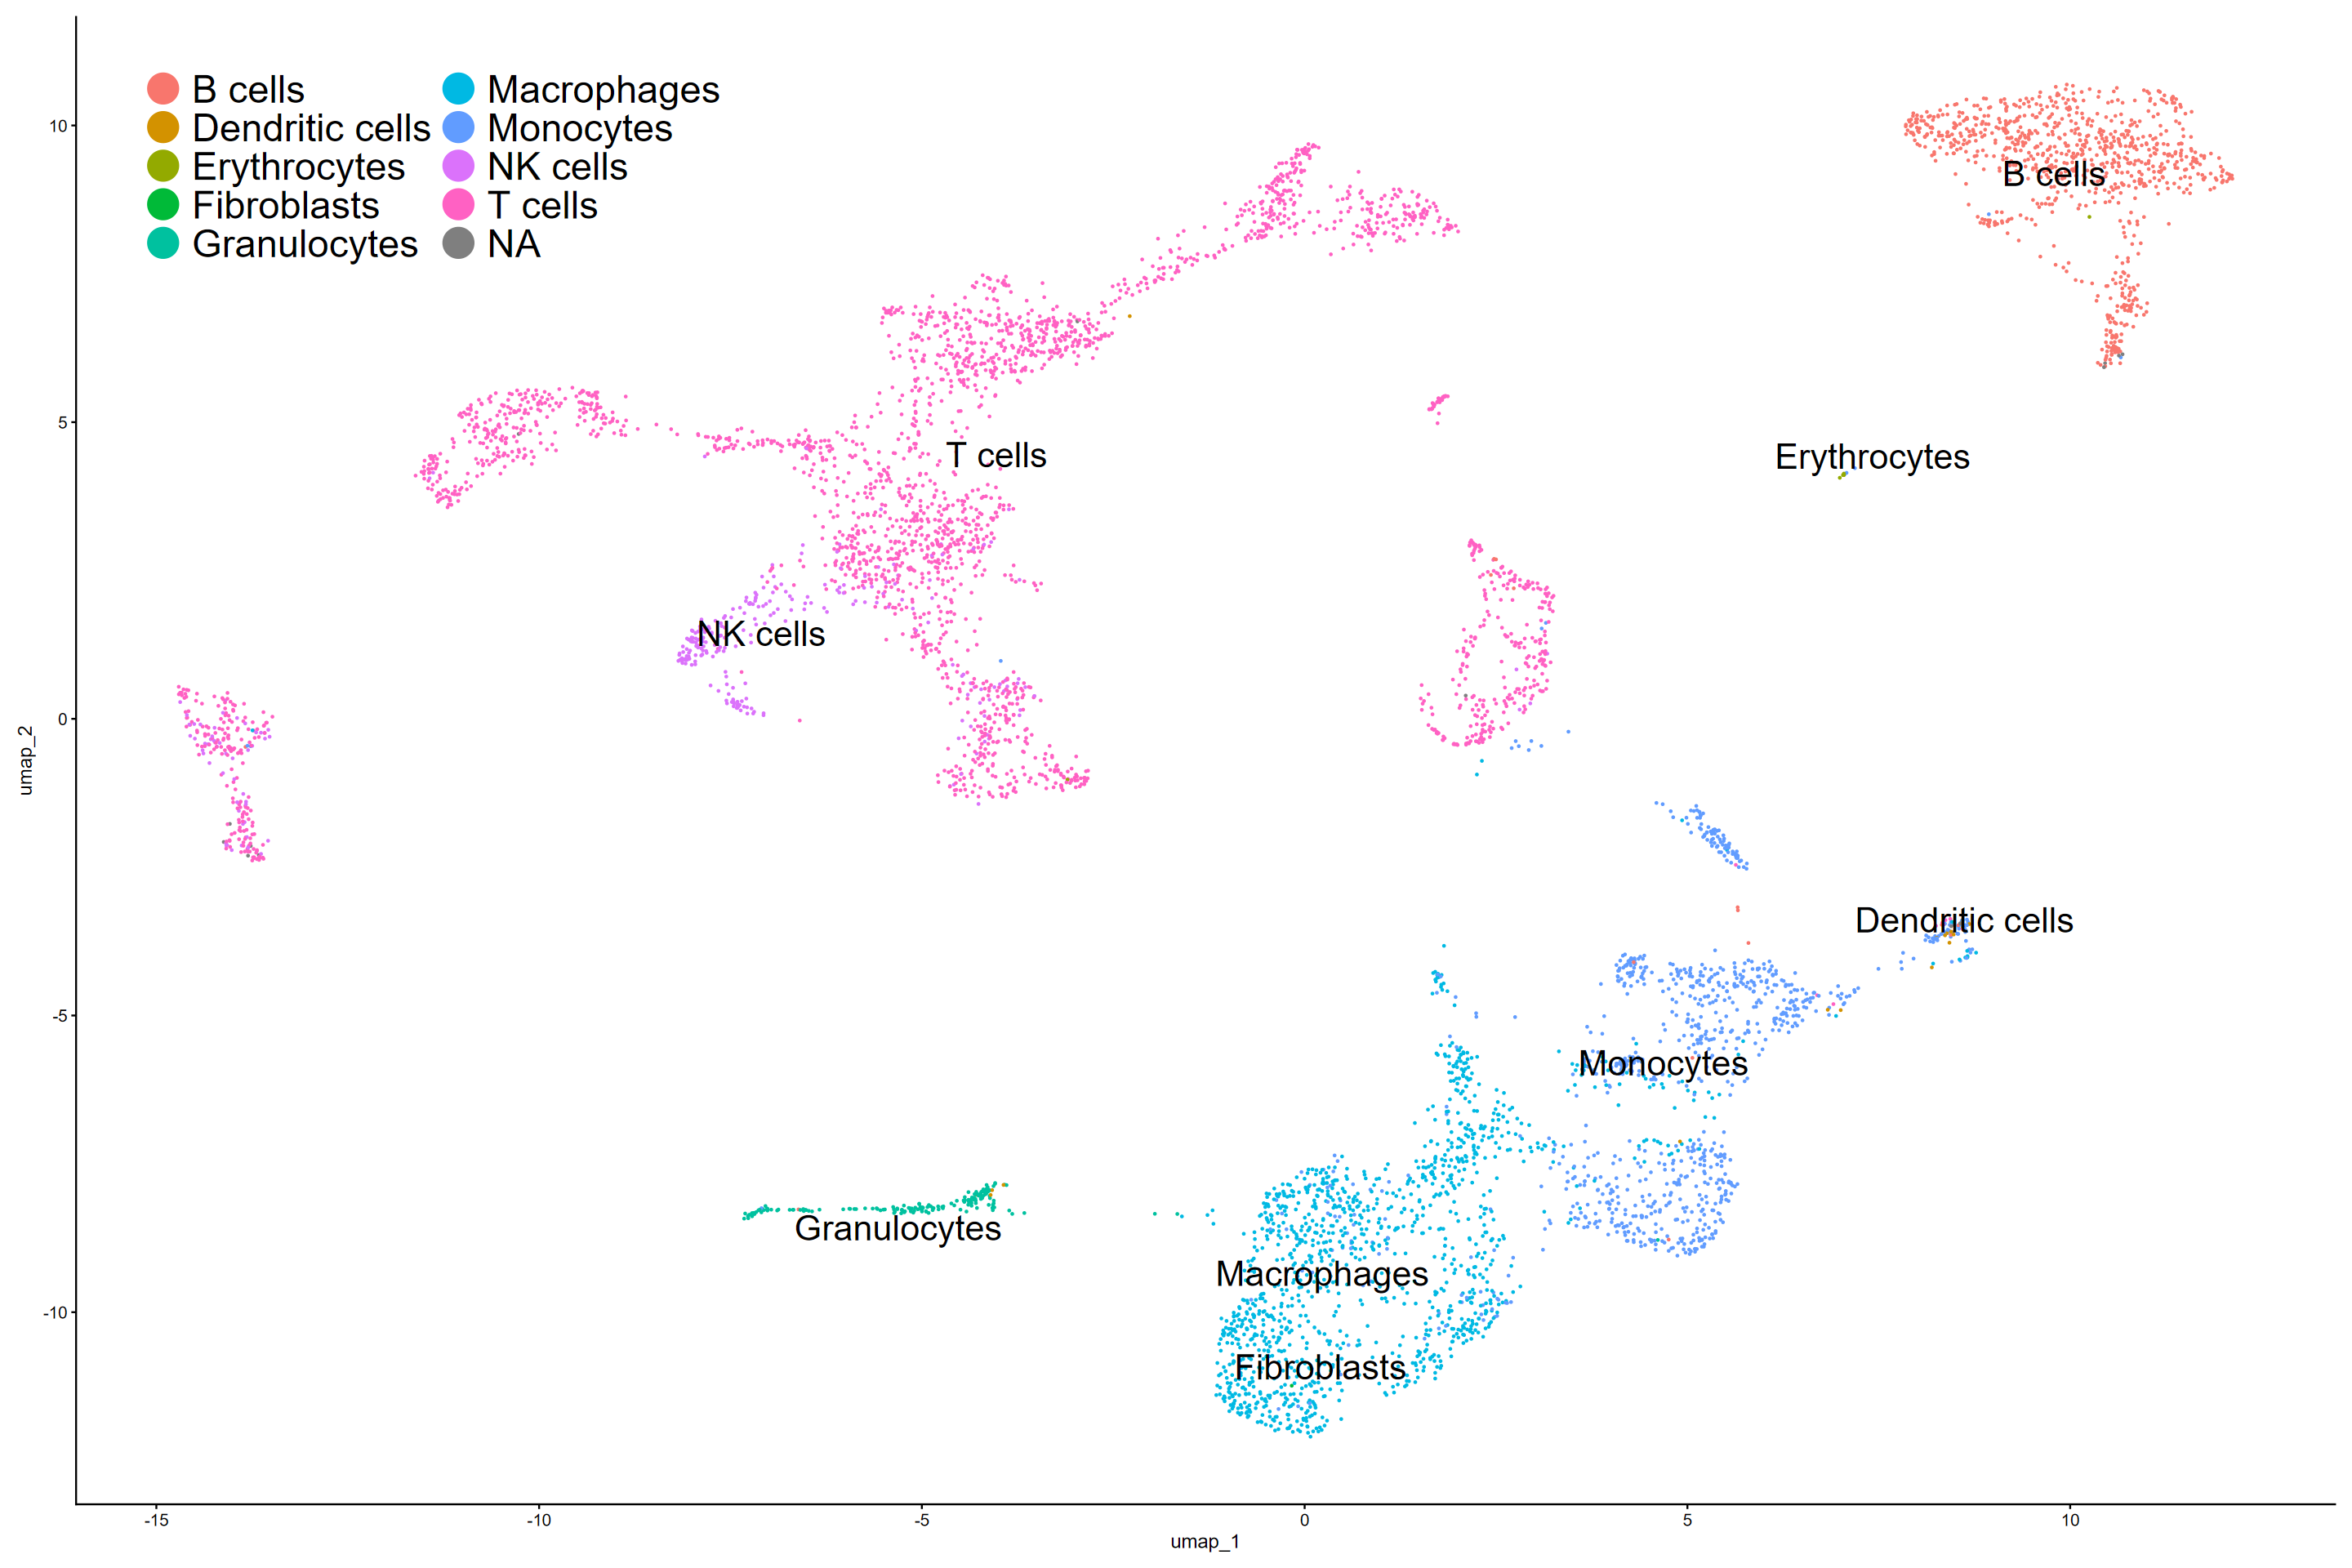

In [127]:
options(repr.plot.width=24, repr.plot.height=16)

single_r_plot <- DimPlot(data, reduction = "umap", group.by = "SingleR_Labels", label = TRUE, label.size = 9, repel = T) + 
    ggtitle("UMAP with SingleR Annotations") + 
    theme(plot.title = element_blank(), legend.position = c(0.03, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))

single_r_plot

In [ ]:
# Macrophages
macrophages <- readRDS("../../../data/R Objects/Macrophage R Objects/all_mice_macrophage_data_annotatedv2.rds")
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
macrophages <- RenameIdents(macrophages,
                                   '0' = 'Inflammatory Macrophages',
                                   '1' = 'Resident-like Macrophages',
                                   '2' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this one
                                   '3' = 'Inflammatory Macrophages',
                                   '4' = 'Resident-like Macrophages',
                                   '5' = 'LAM',
                                   '6' = 'iLAM', #TREM1 Foamy (possible)
                                   '7' = 'Inflammatory Macrophages',
                                   '8' = 'LAM',
                                   '9' = 'Resident-like Macrophages',
                                   '10' = 'LAM',
                                   '11' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this on | Inflammatory Macrophages (?)
                                   '12' = 'IFNIC Macrophages')

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=26)

# Markers
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

# Get top markers based on filters
top_markers <- markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 

Calculating cluster Inflammatory Macrophages

Calculating cluster Resident-like Macrophages

Calculating cluster LAM

Calculating cluster iLAM

Calculating cluster IFNIC Macrophages



In [ ]:
# Find top 30 markers, to put in appendix
top_markers <- markers %>%
  group_by(cluster) %>%
  top_n(n = 30, wt = avg_log2FC) %>%
  arrange(cluster, desc(avg_log2FC))

# Create a smaller version to avoid massive tables
latex_table <- top_markers %>% dplyr::select(cluster, gene, avg_log2FC, pct.1, pct.2, p_val, p_val_adj)

# Convert to LaTeX table
print(xtable(latex_table), include.rownames = FALSE)

% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Fri Mar 28 05:49:49 2025
\begin{table}[ht]
\centering
\begin{tabular}{llrrrrr}
  \hline
cluster & gene & avg\_log2FC & pct.1 & pct.2 & p\_val & p\_val\_adj \\ 
  \hline
Inflammatory Macrophages & Tnfsf9 & 1.85 & 0.35 & 0.16 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Dusp2 & 1.82 & 0.32 & 0.15 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Nlrp3 & 1.68 & 0.35 & 0.17 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Kdm6b & 1.63 & 0.53 & 0.30 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Maff & 1.63 & 0.27 & 0.14 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Cd83 & 1.62 & 0.82 & 0.63 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Rab20 & 1.54 & 0.39 & 0.23 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Ccl3 & 1.47 & 0.71 & 0.50 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Phlda1 & 1.46 & 0.45 & 0.26 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Sde2 & 1.46 & 0.31 & 0.19 & 0.00 & 0.00 \\ 
  Inflammatory Macrophages & Cxcl2

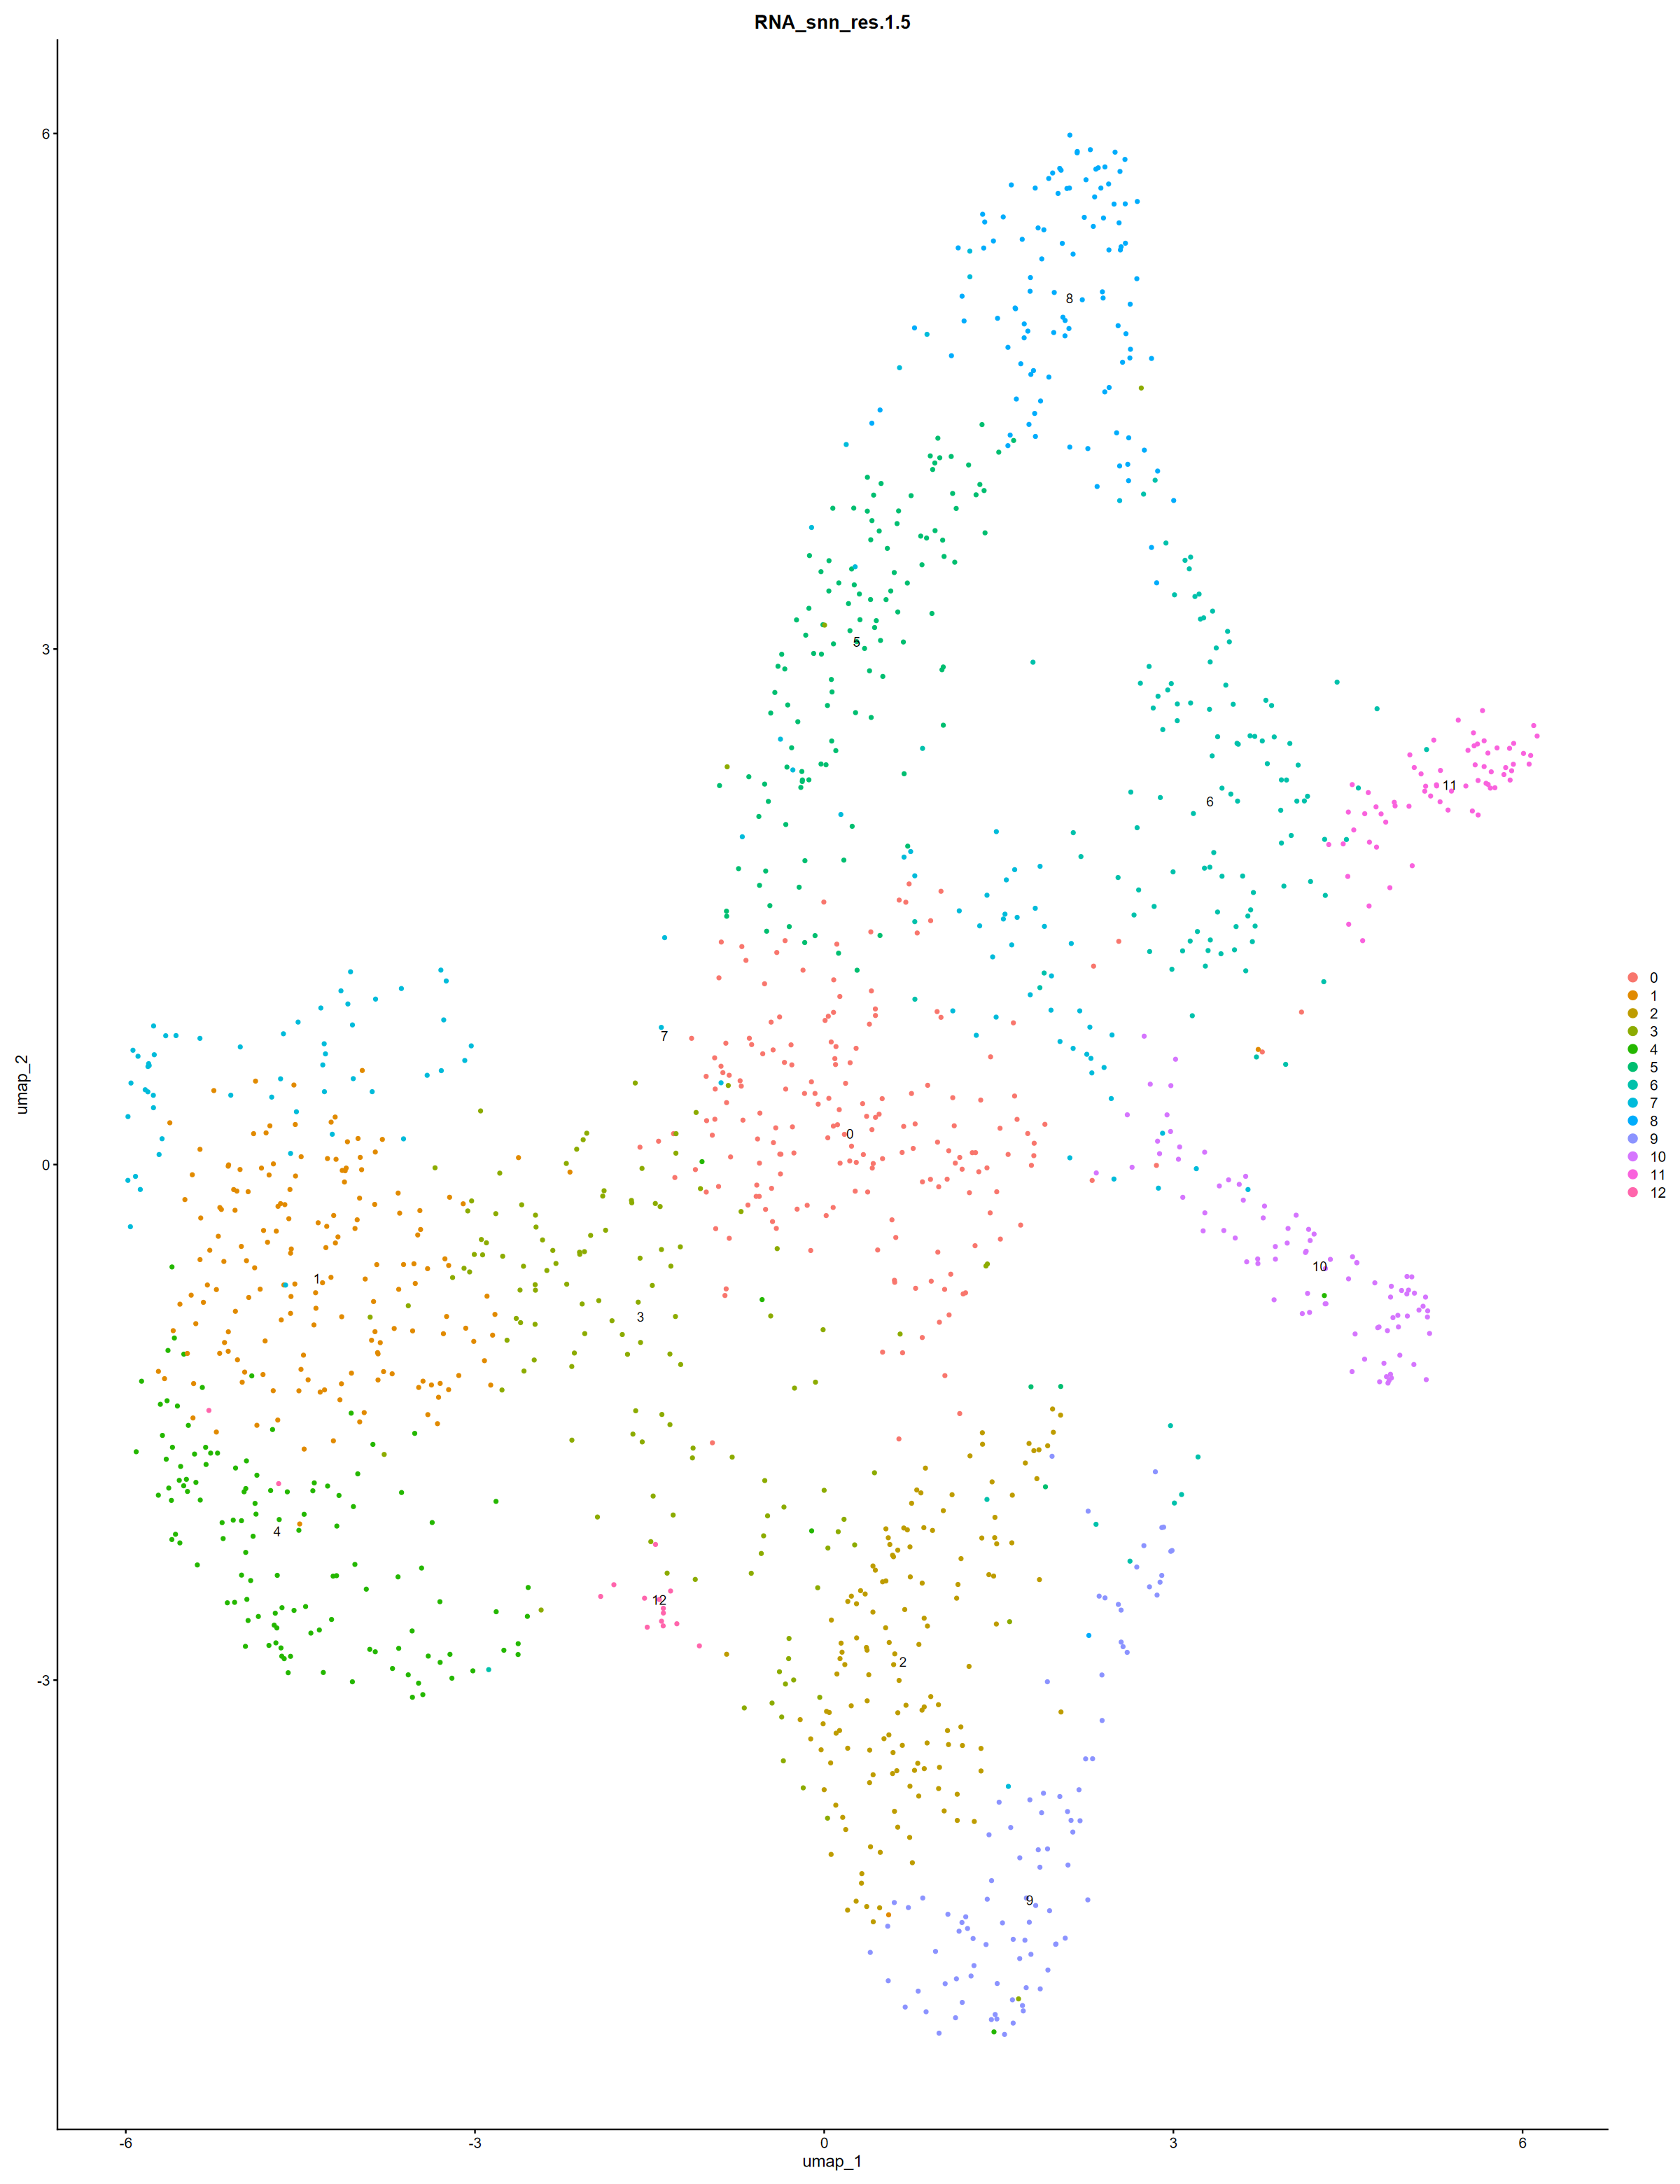

In [ ]:
# Dimplot res = 1.5 of mouse macrophage cells
DimPlot(macrophages, reduction="umap", group.by="RNA_snn_res.1.5", label = T)

In [ ]:
# Proportion tables
Percentage_cells <- prop.table(table(Idents(macrophages))) * 100

# Combine tables side by side
combined_df <- cbind(Percentage_cells)

# Print
combined_df

# Needs to be dataframe
Percentage_cells_df <- as.data.frame(Percentage_cells)
colnames(Percentage_cells_df) <- c("Celltype", "Percentage")

# Basic piechart
pie_chart_total <- ggplot(Percentage_cells_df, aes(x="", y=Percentage, fill=Celltype)) +
  geom_bar(stat="identity", width=1) +
  #scale_fill_manual(values = colors ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank()) +
  geom_text_repel(aes(label = paste0(round(Percentage, 1), "%")),  
            position = position_stack(vjust = .5), 
            color = "black",
            size = 16) +
  coord_polar("y", start=0)

# Calculate the proportions as percentages
percentage_per_orig <- prop.table(table(Idents(macrophages), macrophages$orig.ident), 2) * 100

# Needs to be dataframe
percentage_per_orig_df <- as.data.frame(percentage_per_orig)

percentage_per_orig_df <- percentage_per_orig_df %>%
  mutate(Var2 = recode(Var2, 
                            "Healthy (CD20, CD8, CHOW)" = "CD20, CD8, CD Baseline"))

colnames(percentage_per_orig_df) <- c("Celltype", "Condition", "Percentage")

# Create a stacked bar plot
barplot_per_origin <- ggplot(percentage_per_orig_df, aes(x = Condition, y = Percentage, fill = Celltype)) +
  geom_bar(stat = "identity") + 
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.y = element_text(size = 32, face = "bold"),
    axis.text.x = element_text(size = 32, face = "bold"),
    panel.grid = element_blank()
  ) 

Percentage_cells
Inflammatory macrophages  43.237705       
Resident-like macrophages 26.502732       
iLAMs                      7.786885       
LAMs                      21.448087       
IFNIC macrophages          1.024590

Warning message:
"Only one identity present, the expression values will be not scaled"


NULL

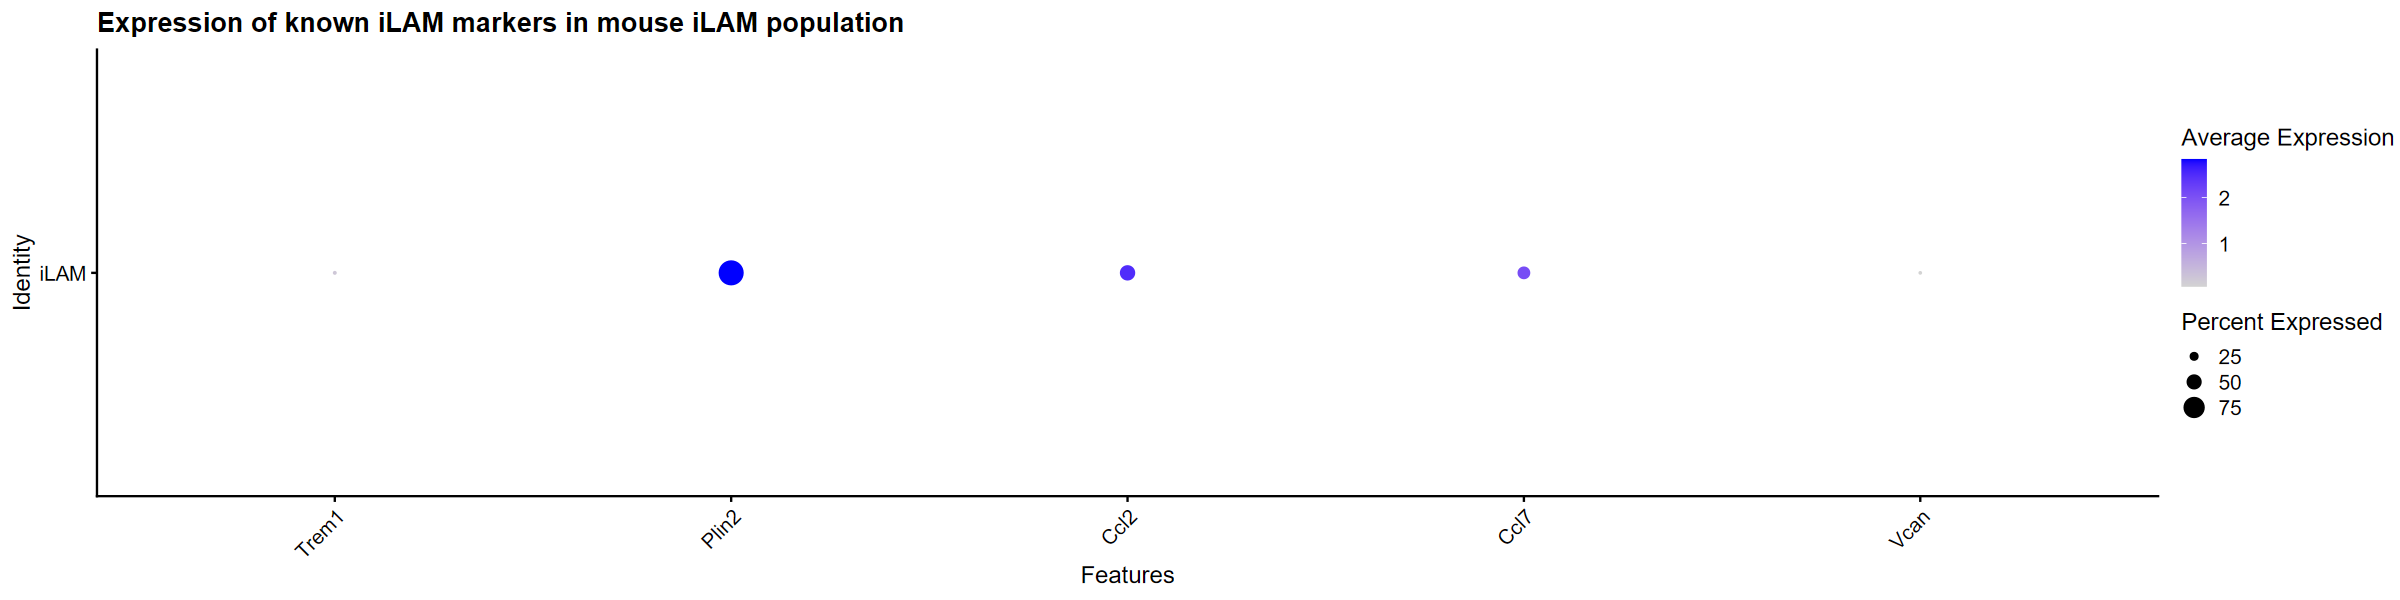

In [ ]:
# Dotplot
known_ilams_m <- c("Trem1", "Plin2", "Ccl2", "Ccl7", "Vcan")

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=5)
dotplot_all_markers <- DotPlot(subset(macrophages, idents = "iLAM"), features = known_ilams_m) + RotatedAxis() + ggtitle("Expression of known iLAM markers in mouse iLAM population")
 labs(y = NULL) +
 theme(
  axis.title.x = element_blank(),
    axis.text.x = element_text(size = 30), 
    axis.text.y = element_text(size = 30), 
    legend.text = element_text(size = 30), 
    legend.title = element_text(size = 30) 
  )

# Dotplot of all markers
dotplot_all_markers

In [ ]:
# Rename idents to plural
macrophages <- RenameIdents(
    object = macrophages,
    "Inflammatory Macrophages" = "Inflammatory macrophages", 
    "Resident-like Macrophages" = "Resident-like macrophages", 
    "iLAM" = "iLAMs", 
    "LAM" = "LAMs", 
    "IFNIC Macrophages" = "IFNIC macrophages")

In [15]:
# Change the order of identities to match color scheme in plot
Idents(macrophages) <- factor(Idents(macrophages), levels = c("Inflammatory macrophages", "Resident-like macrophages","iLAMs", "LAMs", "IFNIC macrophages"))

In [ ]:
# Plot of res = 1.5
res_1.5_plot <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T, label.size = 7) + theme(legend.position= "none", plot.title = element_blank())

# Replace SELENOP to mouse homolog Sepp1
known_markers_m <- str_to_title(c("LYVE1", "FOLR2", "C1QA", "CX3CR1", "Sepp1", "S100A8", "S100A9", "NLRP3", "IL1B", "CXCL2", "TREM2", "FABP5", "APOE", "CD9", "APOC1", "TREM1", "PLIN2", "CCL2", "CCL7", "VCAN", "ISG15", "IRF7", "IFIT3", "IFIT1", "STMN1", "TOP2A", "MKI67", "TUBA1B"))

# Dotplot
dotplot_all_markers <- DotPlot(macrophages, features = known_markers_m) + RotatedAxis() +
 labs(y = NULL) +
 theme(
  axis.title.x = element_blank(),
    axis.text.x = element_text(size = 28), 
    axis.text.y = element_text(size = 28), 
    legend.text = element_text(size = 24), 
    legend.title = element_text(size = 24) 
  )

# Final annotation plot
final_annotation <- DimPlot(object = macrophages, reduction = "umap", label = T, label.size = 12, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.02, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

heatmap <- DoHeatmap(macrophages, features = top10$gene, size=5, angle=0, raster=FALSE, label = FALSE) +
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(axis.text.y = element_text(size=27)) + guides(
  colour = FALSE, fill = guide_colorbar(
    barwidth = 2, 
    bar.height = 60, 
    title.theme = element_text(size = 24),
    label.theme = element_text(size = 24))
  )

Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."
Warning message in DoHeatmap(macrophages, features = top10$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tmem38b"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


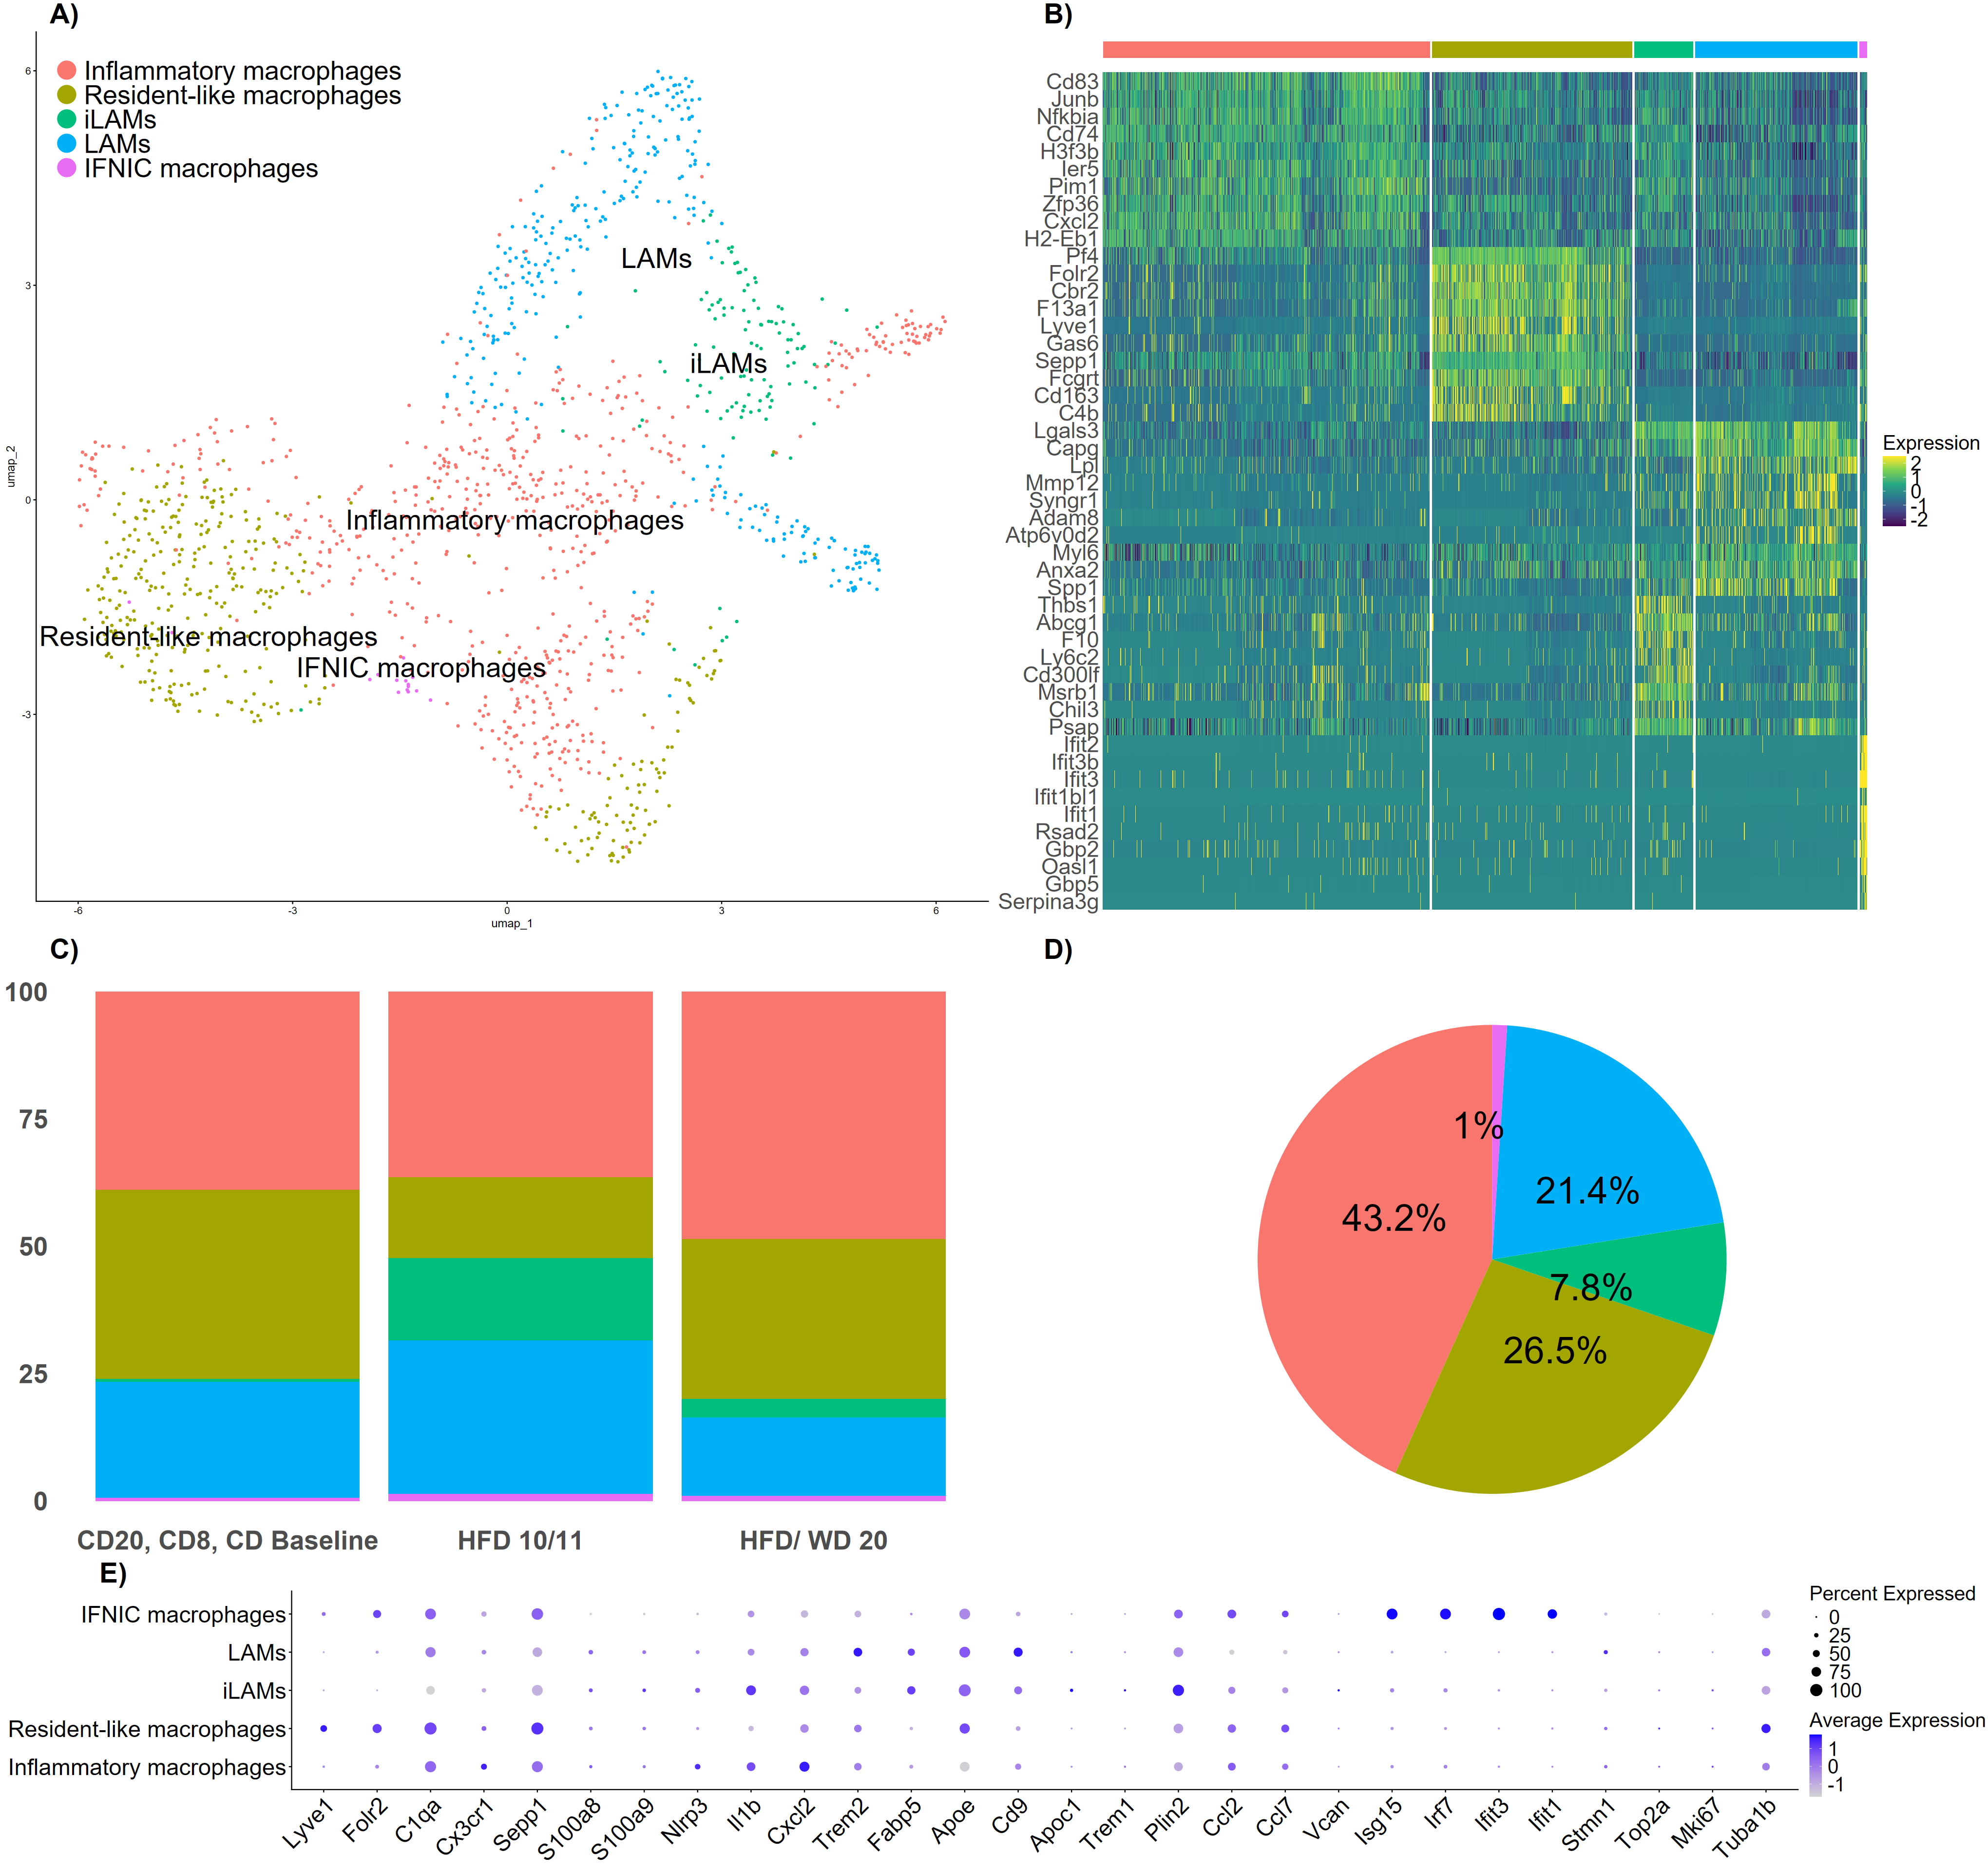

In [ ]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=34, repr.plot.height=32)

# Define the layout matrix
layout_matrix <- rbind(
  c(1, 1, 2, 2),
  c(1, 1, 2, 2),
  c(1, 1, 2, 2),
  c(3, 3, 5, 5),
  c(3, 3, 5, 5),
  c(4, 4, 4, 4)
)

# Create labeled plots
#cluster_umap <- arrangeGrob(res_1.5_plot, 
#                                  top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
#                                                 gp = gpar(fontsize = 34, fontface = "bold")))

dotplot_markers <- arrangeGrob(dotplot_all_markers, 
                               top = textGrob("E)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

final_annotation_plot <- arrangeGrob(final_annotation, 
                               top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

heatmap_plot <- arrangeGrob(heatmap, 
                               top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

barplot_plot <- arrangeGrob(barplot_per_origin, 
                               top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

pie_chart_total_plot <- arrangeGrob(pie_chart_total, 
                               top = textGrob("D)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))                                              

# Arrange the plots with labels
grid.arrange(
  final_annotation_plot, heatmap_plot, barplot_plot, dotplot_markers, pie_chart_total_plot,
  layout_matrix = layout_matrix
)

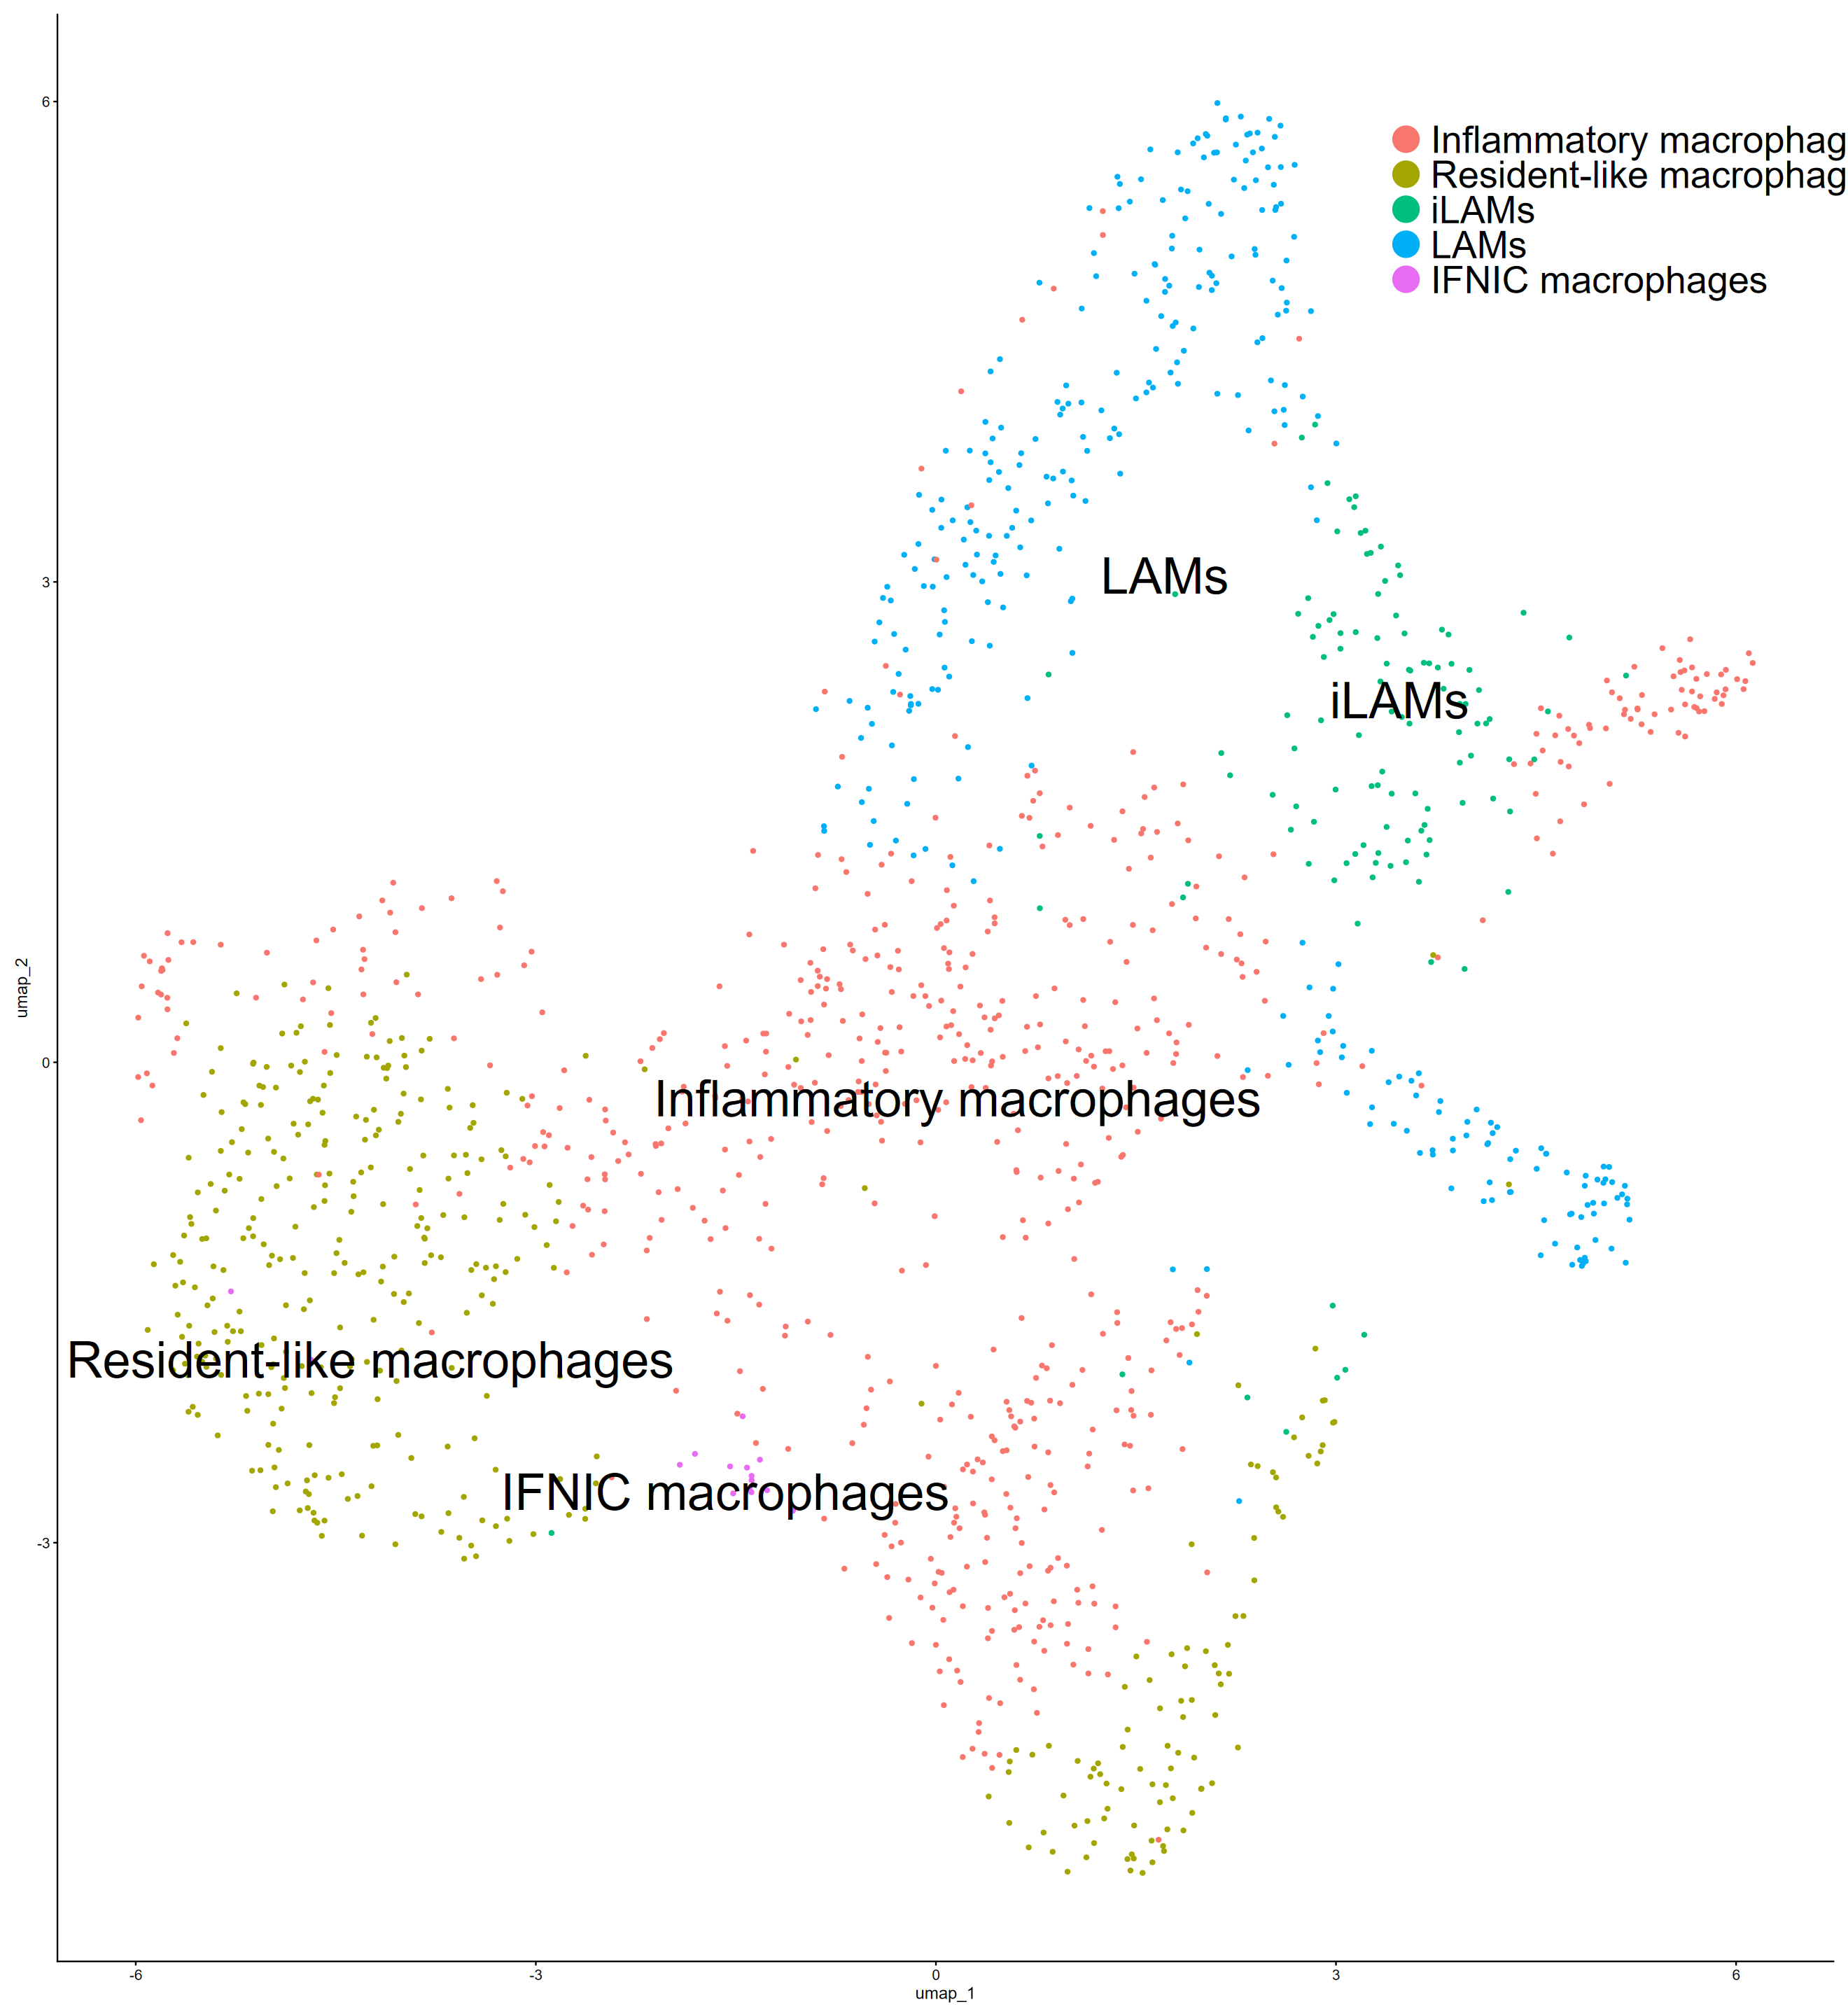

In [ ]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=22, repr.plot.height=24)

# Plot final annotation of macrophages
final_annotation_m <- DimPlot(object = macrophages, reduction = "umap", label = T, label.size = 15, repel = T, pt.size =1.3) + 
    theme(plot.title = element_blank(), legend.position = c(0.75, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))
final_annotation_m